In [3]:
import os
os.environ['SDL_VIDEODRIVER'] = 'dummy'
import pygame
pygame.display.set_mode((1,1))


<Surface(1x1x32 SW)>

GLError: GLError(
	err = 1282,
	description = b'invalid operation',
	baseOperation = glGenTextures,
	pyArgs = (
		1,
		<object object at 0x0000019FC2620C10>,
	),
	cArgs = (1, array([0], dtype=uint32)),
	cArguments = (1, array([0], dtype=uint32))
)

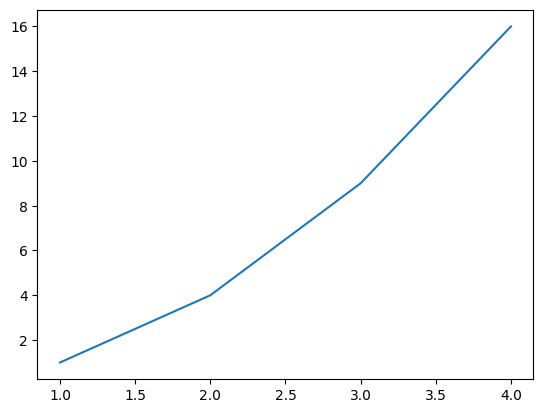

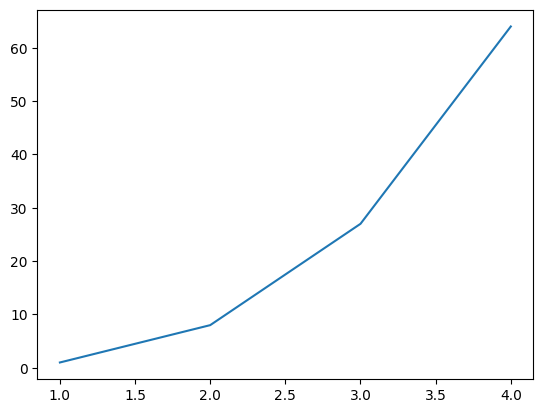

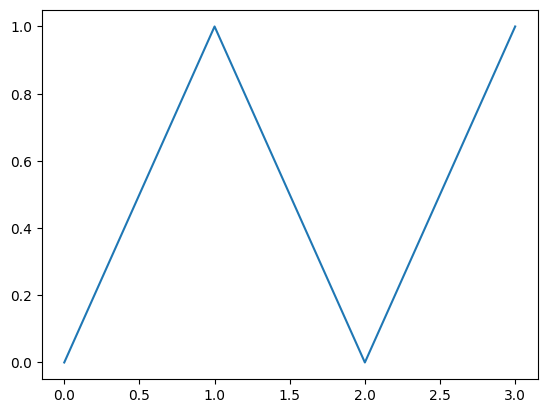

In [4]:
import pygame
from OpenGL.GL import *
from OpenGL.GLU import *
from matplotlib import pyplot as plt
from PIL import Image

# Define the vertices and edges of the cube
vertices = (
    (-1, -1, -1),
    (-1, 1, -1),
    (1, 1, -1),
    (1, -1, -1),
    (-1, -1, 1),
    (-1, 1, 1),
    (1, -1, 1),
    (1, 1, 1)
)

edges = (
    (0,1),
    (0,3),
    (0,4),
    (1,2),
    (1,5),
    (2,3),
    (2,7),
    (3,6),
    (4,5),
    (4,6),
    (5,7),
    (6,7)
)

# Create the cube using PyOpenGL
def Cube():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(vertices[vertex])
    glEnd()

# Load the three graph images using Matplotlib and save them as image files
fig1 = plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.savefig('graph1.png')

fig2 = plt.figure()
plt.plot([1, 2, 3, 4], [1, 8, 27, 64])
plt.savefig('graph2.png')

fig3 = plt.figure()
plt.plot([0, 1, 2, 3], [0, 1, 0, 1])
plt.savefig('graph3.png')

# Load the graph images as textures using PyOpenGL
def LoadTexture(filename):
    img = Image.open(filename)
    textureData = img.tobytes("raw", "RGBA", 0, -1)
    width, height = img.size
    texture = glGenTextures(1)
    glBindTexture(GL_TEXTURE_2D, texture)
    glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_WRAP_S, GL_REPEAT)
    glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_WRAP_T, GL_REPEAT)
    glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_MAG_FILTER, GL_NEAREST)
    glTexParameterf(GL_TEXTURE_2D, GL_TEXTURE_MIN_FILTER, GL_NEAREST)
    glTexImage2D(GL_TEXTURE_2D, 0, GL_RGBA, width, height, 0, GL_RGBA, GL_UNSIGNED_BYTE, textureData)
    return texture

texture1 = LoadTexture('graph1.png')
texture2 = LoadTexture('graph2.png')
texture3 = LoadTexture('graph3.png')

# Define the Pygame window and OpenGL settings
pygame.init()
display = (800,600)
pygame.display.set_mode(display, pygame.DOUBLEBUF|pygame.OPENGL)

gluPerspective(45, (display[0]/display[1]), 0.1, 50.0)
glTranslatef(0.0,0.0,-5)

glEnable(GL_DEPTH_TEST)
glEnable(GL_TEXTURE_2D)



In [ ]:
# Define a variable to keep track of the current graph
current_graph = 1

# Start the Pygame event loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            quit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                current_graph += 1
                if current_graph > 3:
                    current_graph = 1

    glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)

    glRotatef(1, 3, 1, 1)

    glBindTexture(GL_TEXTURE_2D, texture1 if current_graph == 1 else texture2 if current_graph == 2 else texture3)

    Cube()

    pygame.display.flip()
    pygame.time.wait(10)
